In [3]:
from mySSA import mySSA

import pandas as pd
import numpy as np

In [14]:
ts = pd.read_csv('data.csv', parse_dates=True, index_col='bulan')

In [16]:
ssa = mySSA(ts)

In [17]:
[x for x in dir(ssa) if '__' not in x and x[0]!='_']

['decompose',
 'diagonal_averaging',
 'embed',
 'forecast_recurrent',
 'freq',
 'get_contributions',
 'ts',
 'ts_N',
 'ts_name',
 'ts_v',
 'view_reconstruction',
 'view_s_contributions',
 'view_time_series']

In [18]:
K = 40
suspected_seasonality = 12

In [19]:
ssa.embed(embedding_dimension=40, suspected_frequency=suspected_seasonality, verbose=True)

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  36
Trajectory dimensions	: (36, 110)
Complete dimension	: (36, 109)
Missing dimension     	: (36, 1)


In [20]:
ssa.decompose(verbose=True)

----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 36
Dimension of projection space	: 36
Characteristic of projection	: 1.0


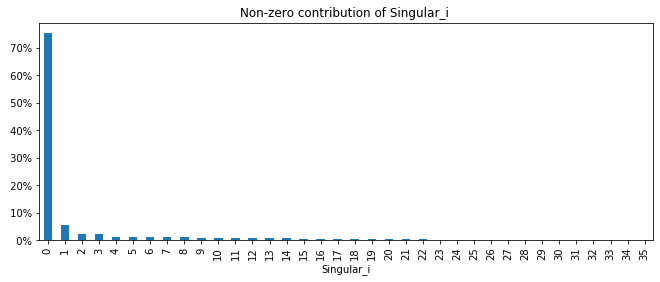

In [21]:
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 4

ssa.view_s_contributions()

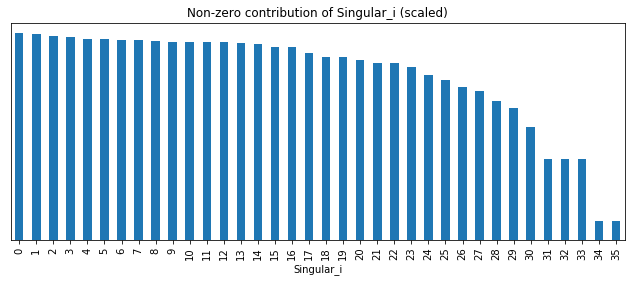

In [22]:
ssa.view_s_contributions(adjust_scale=True)

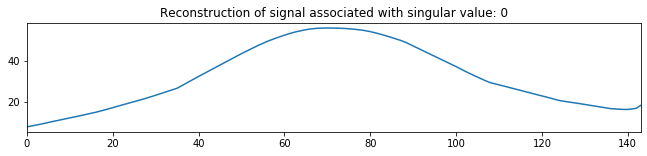

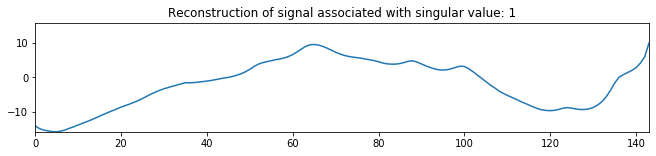

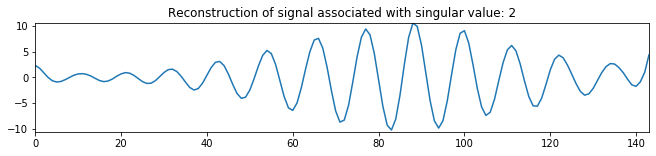

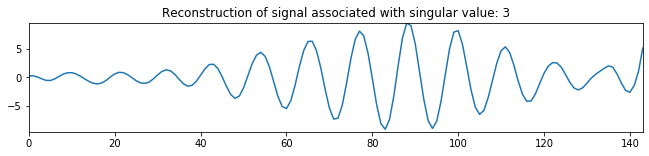

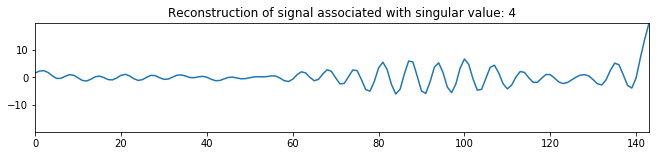

In [23]:
rcParams['figure.figsize'] = 11, 2
for i in range(5):
    ssa.view_reconstruction(ssa.Xs[i], names=i, symmetric_plots=i!=0)
rcParams['figure.figsize'] = 11, 4

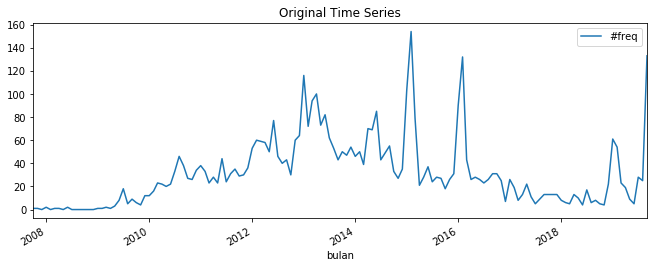

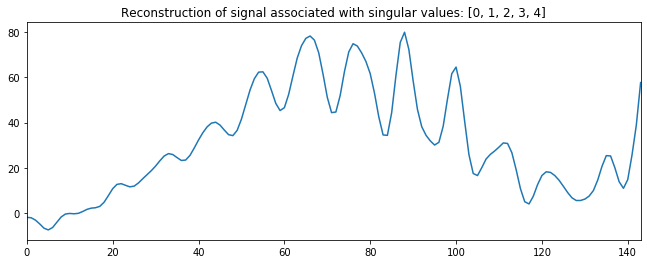

In [24]:
ssa.ts.plot(title='Original Time Series'); # This is the original series for comparison
streams5 = [i for i in range(5)]
reconstructed5 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], names=streams5, return_df=True)

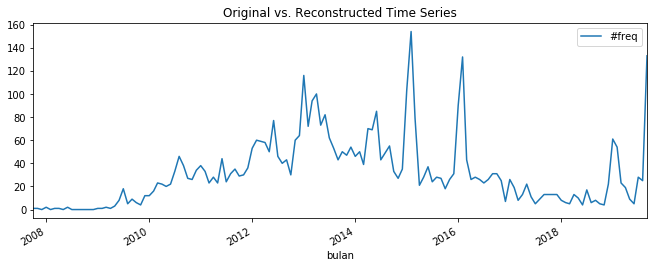

In [34]:
ts_copy5 = ssa.ts.copy()
#ts_copy5['Reconstruction'] = reconstructed5.Reconstruction.values

ts_copy5.plot(title='Original vs. Reconstructed Time Series');

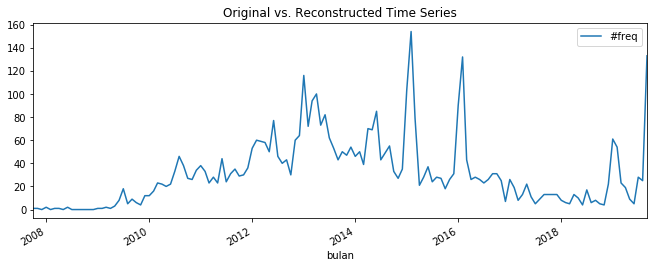

In [36]:
streams10 = [i for i in range(10)]
reconstructed10 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams10], 
                                          names=streams10, return_df=True, plot=False)
ts_copy10 = ssa.ts.copy()
#ts_copy10['Reconstruction'] = reconstructed10.Reconstruction.values
ts_copy10.plot(title='Original vs. Reconstructed Time Series');

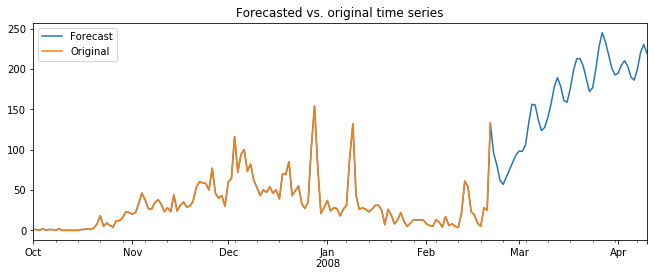

In [37]:
ssa.forecast_recurrent(steps_ahead=48, singular_values=streams10, plot=True)

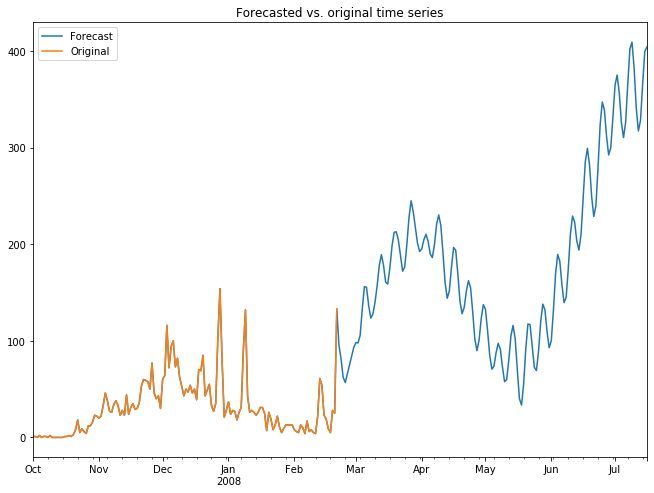

In [38]:
rcParams['figure.figsize'] = 11,8
ssa.forecast_recurrent(steps_ahead=ssa.ts.shape[0], singular_values=streams10, plot=True)
rcParams['figure.figsize'] = 11, 4